- Choose Stakeholder: For whom are you performing this analysis (Every Door Real Estate)
- Business Understanding: at least 2 important parameters estimates as recomendations
- Data Understanding: Whats in this data, how relevant is this data
- Data Prep: Train/Test split, Nulls, Duplicates, Outlires, Log transformation, encoding variables (one-hot-encoding, binning), polynomial features, interation terms, SCALE
- At least one non numaric feature included in a model
- First simple model: what is your model-less baseline
- Interactive Modeling: Iterate by adding complexity( more columns, different interations:
- Each iteration of your model adheres to assumptions of liniear reg
    Linear Relationship, low Multicollinearity(VIF), Normal dis of   Errors(Q-Qplot)(lower the score the more), Homoskedasticity of Errors
- Interpreting models: check if your input variables are statistically significant. R2. 

In [27]:
#Import our tools

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm

In [28]:
#Import our Data

df = pd.read_csv('data/kc_house_data.csv')

In [29]:
#Splitting our data into train and test
y = df["price"]
X = df.drop("price", axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

train = pd.read_csv('data/kc_house_data.csv') #here we just made duplicate data frames
test = pd.read_csv('data/kc_house_data.csv') #here we just made duplicate data frames
X_train = train.drop("price", axis=1)
y_train = train["price"]
X_test = test.drop("price", axis=1)
y_test = test["price"]
train.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,NO,NONE,...,5 Fair,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,NONE,...,4 Low,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,NONE,...,5 Fair,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,NO,NONE,...,6 Low Average,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,NO,NONE,...,5 Fair,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,NO,EXCELLENT,...,12 Luxury,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,NO,NONE,...,13 Mansion,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,...,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,YES,AVERAGE,...,11 Excellent,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


# Cleaning Data

In [30]:
#Quick look at which variables correlate most strongly with 'Price'
salecorr = train.corr()['price'].map(abs).sort_values(ascending=False)
salecorr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [31]:
#Looking into if we should drop ID or not

X_train.id.value_counts()

##noticed one home ID was sold three times in the two year period


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [32]:
X_train[X_train.id == 795000620]

#looking at the ID with three sale data points, 
#they are all difference sales with different prices, decided to keep this home ID

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,3,1.0,1080,6250,1.0,NaN,NONE,Fair,5 Fair,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [33]:
X_train = X_train.drop(columns=['lat', 'long','id', 'date'])
#Dropping Latitude, Longitude, ID and date
#reasons here

In [34]:
X_train.yr_renovated.isnull().value_counts()
X_train.yr_renovated = X_train.yr_renovated.fillna(0) #changing null values for yr rennovaed to 0
X_train.yr_renovated.value_counts()
X_train.view = X_train.view.fillna('NONE') #changing null values for 'view' into none



In [35]:
X_train['waterfront'] = X_train.waterfront.fillna('N/A')

waterfront_or = X_train.loc[:, ['waterfront']]

encoder_water = OrdinalEncoder()

encoder_water.fit(waterfront_or)

encoder_water.categories_[0]

water_trans = encoder_water.transform(waterfront_or)

water_trans = water_trans.flatten()

X_train['waterfront'] = water_trans

In [36]:
X_train.waterfront.value_counts()

1.0    19075
0.0     2376
2.0      146
Name: waterfront, dtype: int64

In [37]:
X_train.drop(columns='waterfront', inplace=True)

In [38]:
# Portion of yes is too small to be a good predictor. 

In [39]:
X_train[X_train.bedrooms == 33]
X_train.bedrooms.value_counts().sort_values(ascending=False)
X_train.drop(index=15856, inplace=True)
# Drop outlire

In [40]:
X_train.view.value_counts()

NONE         19484
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [41]:
X_train.isnull().sum() #yay no more null! 

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21596 non-null  int64  
 1   bathrooms      21596 non-null  float64
 2   sqft_living    21596 non-null  int64  
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   view           21596 non-null  object 
 6   condition      21596 non-null  object 
 7   grade          21596 non-null  object 
 8   sqft_above     21596 non-null  int64  
 9   sqft_basement  21596 non-null  object 
 10  yr_built       21596 non-null  int64  
 11  yr_renovated   21596 non-null  float64
 12  zipcode        21596 non-null  int64  
 13  sqft_living15  21596 non-null  int64  
 14  sqft_lot15     21596 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 2.6+ MB


In [43]:
X_train["view"] = X_train["view"].fillna("N/A")
from sklearn.preprocessing import OneHotEncoder 
view = X_train[["view"]]
ohe = OneHotEncoder(categories="auto",sparse=False,handle_unknown="ignore")
ohe.fit(view)
view_trans = ohe.transform(view)
view_trans1= pd.DataFrame(view_trans, columns=ohe.categories_[0],index=X_train.index)
view_trans1
X_train.drop("view", axis=1, inplace=True)
X_train = pd.concat([X_train, view_trans1], axis=1)

In [44]:
y_train.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [45]:
len(y_train.loc[y_train<=1.5*10**6])/len(y_train) #homes over 1.5 million are in the top 97%

0.976107792748993

In [46]:
len(y_train)

21597

In [47]:
y_train = y_train[y_train <= 1500000]
len(y_train) #new length

21081

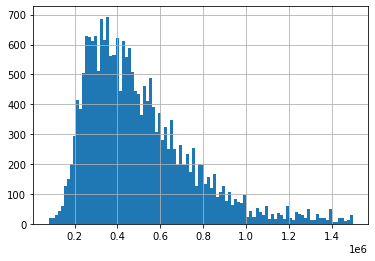

In [50]:
y_train.hist(bins=100)
plt.show;

In [60]:
#added sale average column to our X_train dataset. 

X_train['sale_average'] = y_train.mean()
print(len(X_train))
print(len(y_train))

21596
21081


In [62]:
#Building baseline model
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [63]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

ValueError: Found input variables with inconsistent numbers of samples: [21596, 21081]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist((y_train), bins=200)

ax.set_xlabel("Price (USD) Millions")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution House Prices");

In [ ]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(

    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"},
    cmap='Greens'
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [ ]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), center=0, annot=True, cmap="coolwarm", annot_kws={"size":10})

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.40)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [ ]:
sns.lmplot(data=df, x='price', y='sqft_living')
plt.xlabel('Price Millions')
plt.ylabel('Sqft Living')
plt.title('Price vs sqft livng');

In [ ]:
baseline_model = LinearRegression()

In [ ]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_train_non_numeric = X_train.select_dtypes(exclude=['int64', 'float64'])
X_train_non_numeric

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)

categoricals = ['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']

for col, ax in zip(categoricals, axes.flatten()):
    (train.groupby(col)              
         .mean()['price']       
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)               
    
fig.tight_layout()

In [ ]:
X_train["yr_renovated"] = X_train["yr_renovated"].fillna(0)
# X_train["yr_renovated"] = X_train.loc[~(df==0).all(axis=1)]

In [ ]:
X_train.yr_renovated

# Drop data and sqft_basement(not categorical)

In [ ]:
dummies = pd.get_dummies(train[categoricals], prefix=categoricals, drop_first=True)

df_preprocessed = train.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head()

In [ ]:
price = np.log(df['price']).mean()
logsqft_living = np.log(df['sqft_living']).mean()
